# Nips Papers

In this project, we will construct a paper-author matrix and a graph on papers. We will use PCA, MDS and some spectral methods such as Isomap, Locally linear embedding and Laplacian eigenmaps to reduce its dimension and visualizing to show whether there is clustering on nips papers.

In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import spectral_embedding
pca2 = PCA(n_components=2)
mds2 = MDS(n_components=2)
pca3 = PCA(n_components=3)
mds3 = MDS(n_components=3)
ISO = Isomap(n_neighbors=5,n_components=2) 
LLE = LocallyLinearEmbedding(n_neighbors=5,n_components=2)
LE = SpectralEmbedding(n_neighbors=5,n_components=2)

### Loading dataset...

In [29]:
authors = pd.read_csv("./authors.csv")
paper_authors = pd.read_csv("./paper_authors.csv")
papers = pd.read_csv("./papers.csv")
print('The total number of authors is:',authors.shape[0])
print('The total number of papers is:',papers.shape[0])

The total number of authors is: 9784
The total number of papers is: 6560


#### Authors dataset.

In [30]:
authors.head(5)

,id,name
0,1,Hisashi Suzuki
1,10,David Brady
2,100,Santosh S. Venkatesh
3,1000,Charles Fefferman
4,10000,Artur Speiser


#### Paper_authors dataset.

In [31]:
paper_authors.head(5)

,id,paper_id,author_id
0,1,63,94
1,2,80,124
2,3,80,125
3,4,80,126
4,5,80,127


#### Papers dataset.

In [32]:
papers.head(5)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Part I. Dimensional Reduction and visualization on Euclidean Space

### Step 1: Construct Paper-author matrix - P
> We ultilize paper_author datasetto construct paper-author matrix (6560,9384). Each row is the one-hot vector of a paper, each column represent an author. 

In [33]:
paper_au = {}
paper_ID = []
for i in paper_authors.paper_id:
    if i not in paper_ID:
        paper_ID.append(i)

cl = []
D1 = []
D2 = []
D3 = []
#D4 = []
for k,i in enumerate(paper_ID):
    paper_au[i] = {
        "author":list(paper_authors.author_id[paper_authors.paper_id==i].values),
        "index":k
    }
    if papers.year[papers.id==i].values[0] in range(1987,1997):
        cl.append(0)
        D1.append(k)
    elif papers.year[papers.id==i].values[0] in range(1997,2007):
        cl.append(1)
        D2.append(k)
    elif papers.year[papers.id==i].values[0] in range(2007,2017):
        cl.append(2)
        D3.append(k)
    #elif papers.year[papers.id==i].values[0] in range(2012,2017):
     #   cl.append(3)
      #  D4.append(k)

In [34]:
author_ID = []
author = {}
for i in paper_authors.author_id:
    if i not in author_ID:
        author_ID.append(i)
for i,k in enumerate(sorted(author_ID)):
    author[k] = i
P = np.zeros((len(paper_ID),len(author_ID)))
for i in paper_ID:
    k = paper_au[i]['index']
    au = paper_au[i]['author']
    for j in au:
        P[k][author[j]] = 1

P1 = P[D1]
P2 = P[D2]
P3 = P[D3]
#P4 = P[D4]
# normalize P
P_norm = sklearn.preprocessing.normalize(P)
P1_norm = sklearn.preprocessing.normalize(P1)
P2_norm = sklearn.preprocessing.normalize(P2)
P3_norm = sklearn.preprocessing.normalize(P3)
#P4_norm = sklearn.preprocessing.normalize(P4)

### Step2: Dimensional Reduction using PCA

#### 2-D PCA

In [35]:
P_pca2 = pca2.fit_transform(P_norm)
print(P_pca2)

[[-0.00980612 -0.00861461]
 [-0.00888989 -0.00758724]
 [-0.00891594 -0.00763967]
 ...
 [-0.00983139 -0.00870621]
 [-0.00822959 -0.00688119]
 [-0.00919748 -0.00793964]]


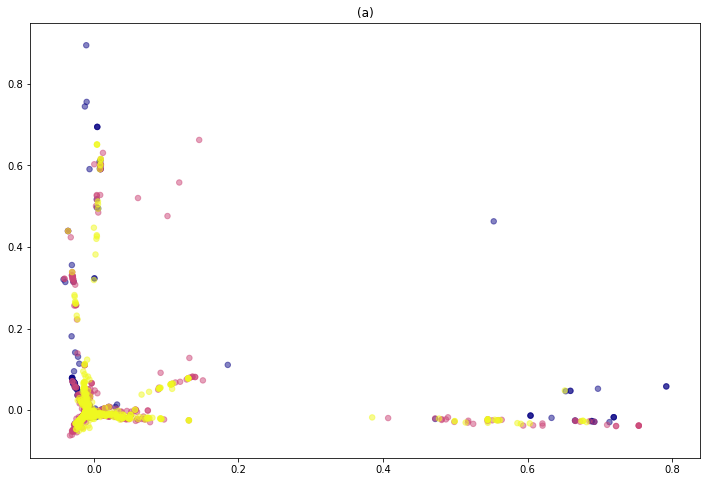

In [152]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(P_pca2[:,0], P_pca2[:,1], s=30, marker = 'o',c=cl, alpha=0.5,cmap='plasma')
plt.title('(a)')
plt.show()

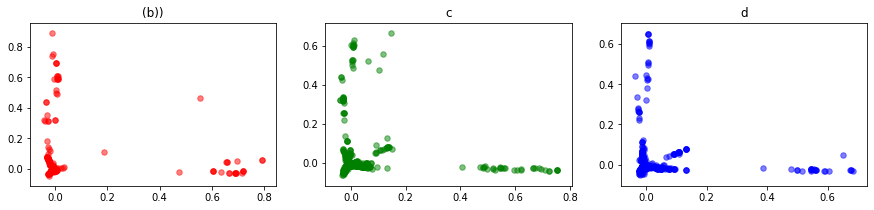

In [154]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.title('(b))')
plt.scatter(P_pca2[D1,0], P_pca2[D1,1], s=30, marker = 'o',c='r', alpha=0.5)
plt.subplot(132)
plt.title('c')
plt.scatter(P_pca2[D2,0], P_pca2[D2,1], s=30, marker = 'o',c='g', alpha=0.5)
plt.subplot(133)
plt.scatter(P_pca2[D3,0], P_pca2[D3,1], s=30, marker = 'o',c='b', alpha=0.5)
plt.title('d')
plt.show()

In [37]:
P1_pca2 = pca2.fit_transform(P1_norm)
print(P1_pca2)
P2_pca2 = pca2.fit_transform(P2_norm)
print(P2_pca2)
P3_pca2 = pca2.fit_transform(P3_norm)
print(P3_pca2)
#P4_pca2 = pca2.fit_transform(P4_norm)
#print(P4_pca2)

[[-0.0220107  -0.01874946]
 [-0.01910212 -0.01540893]
 [-0.01845436 -0.01489424]
 ...
 [ 0.00919678 -0.0177514 ]
 [-0.01871416 -0.01497975]
 [-0.01871416 -0.01497975]]
[[-0.0058629  -0.00523927]
 [-0.00794403 -0.00733662]
 [-0.00698832 -0.00630036]
 ...
 [-0.0058629  -0.00523927]
 [-0.01701798 -0.01284679]
 [-0.00655155 -0.00624882]]
[[-0.00562306 -0.00435325]
 [ 0.00884447  0.01496923]
 [-0.00533673 -0.00645919]
 ...
 [-0.00415573 -0.00515024]
 [-0.0034746  -0.00420879]
 [-0.00393307 -0.00479233]]


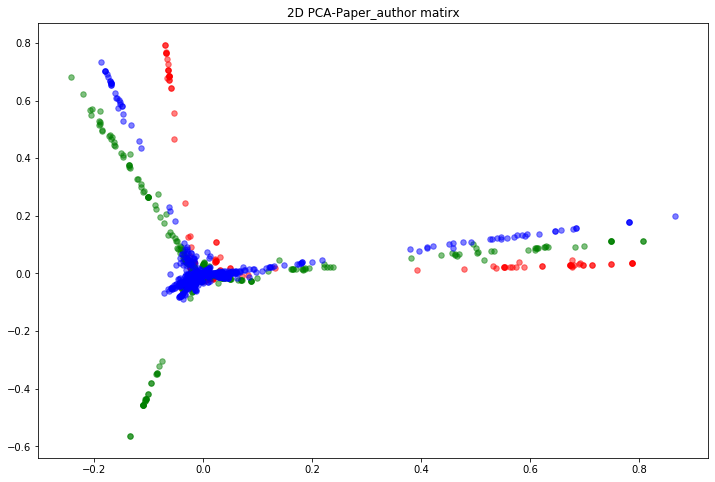

In [38]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(P1_pca2[:,0], P1_pca2[:,1], s=30, marker = 'o',c='r', alpha=0.5)
plt.scatter(P2_pca2[:,0], P2_pca2[:,1], s=30, marker = 'o',c='g', alpha=0.5)
plt.scatter(P3_pca2[:,0], P3_pca2[:,1], s=30, marker = 'o',c='b', alpha=0.5)
#plt.scatter(P4_pca2[:,0], P4_pca2[:,1], s=30, marker = 'o',c='y', alpha=0.5)
plt.title('2D PCA-Paper_author matirx')
plt.show()

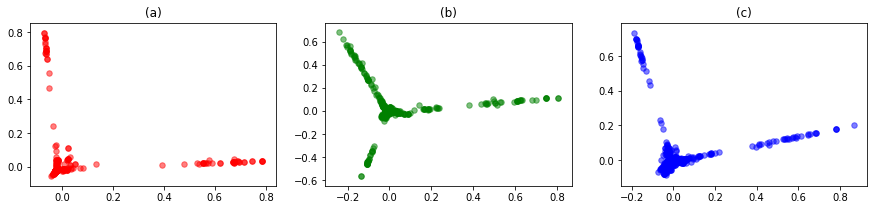

In [155]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(P1_pca2[:,0], P1_pca2[:,1], s=30, marker = 'o',c='r', alpha=0.5)
plt.title('(a)')
plt.subplot(132)
plt.scatter(P2_pca2[:,0], P2_pca2[:,1], s=30, marker = 'o',c='g', alpha=0.5)
plt.title('(b)')
plt.subplot(133)
plt.scatter(P3_pca2[:,0], P3_pca2[:,1], s=30, marker = 'o',c='b', alpha=0.5)
plt.title('(c)')
plt.show()

#### 3-D PCA

In [155]:
P_pca3 = pca3.fit_transform(P_norm)
print(P_pca3)

[[-0.00982039 -0.00865046 -0.00243184]
 [-0.00889989 -0.00761155 -0.00210832]
 [-0.00892668 -0.00766919 -0.00213122]
 ...
 [-0.00985217 -0.00880655 -0.00253336]
 [-0.00823755 -0.00690036 -0.00188591]
 [-0.00920906 -0.00796859 -0.00222535]]


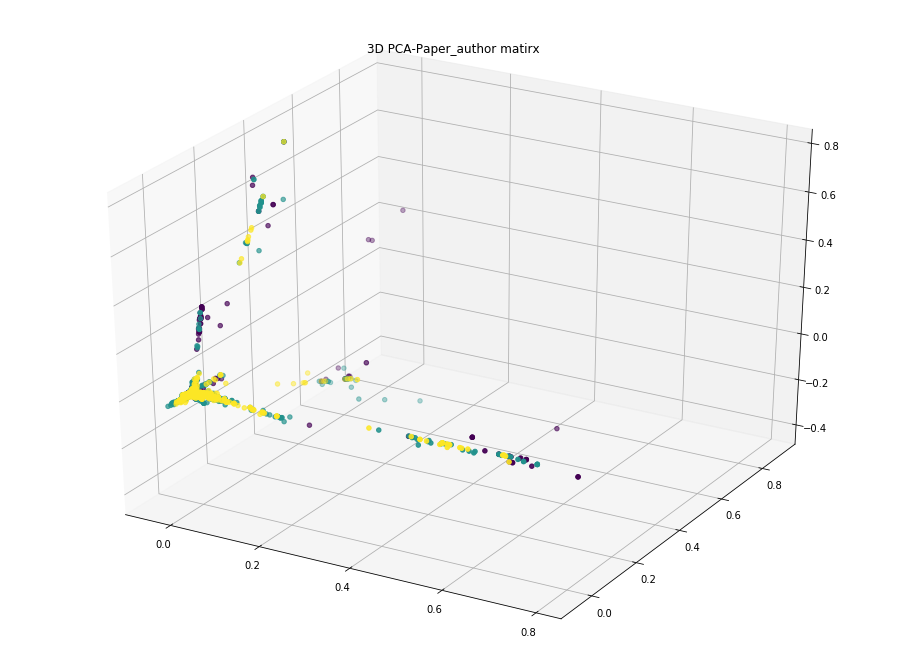

In [138]:
fig = plt.figure(figsize=(16, 12))
cm = plt.get_cmap("plasma")
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(P_pca3[:,0], P_pca3[:,1], P_pca3[:,2], s=20, c=cl, marker='o')  
plt.title('3D PCA-Paper_author matirx')
plt.show()

### Step3: Dimensional Reduction using MDS

#### 2D MDS

In [121]:
P_mds2 = mds2.fit_transform(P_norm)
print(P_mds2)

[[-0.12549511 -0.51069232]
 [ 0.21672013 -0.28969385]
 [ 0.98185598  0.43294086]
 ...
 [-0.30957072 -0.38394939]
 [-0.83250192  0.72083411]
 [-0.80514844  0.73467488]]


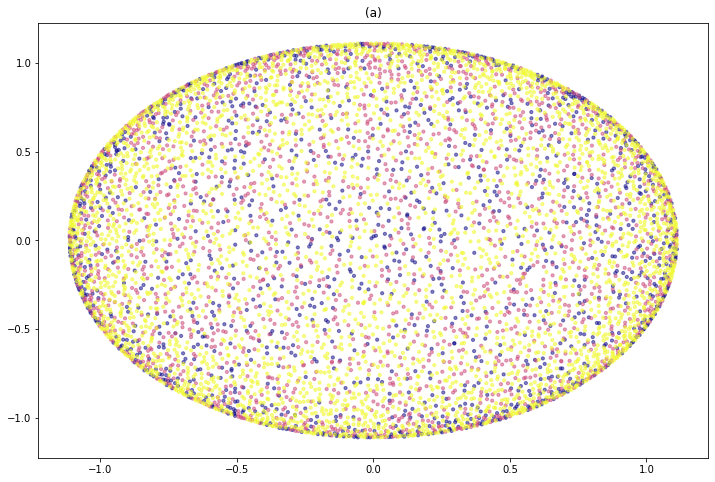

In [156]:
plt.figure(figsize=(12, 8))
plt.scatter(P_mds2[:,0], P_mds2[:,1], s=10, marker = 'o',c=cl, alpha=0.5,cmap='plasma')
plt.title('(a)')
plt.show()

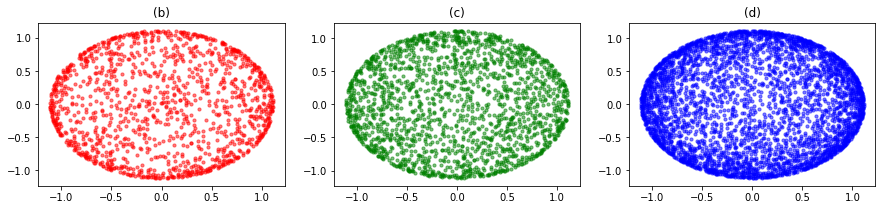

In [157]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(P_mds2[D1,0], P_mds2[D1,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.title('(b)')
plt.subplot(132)
plt.scatter(P_mds2[D2,0], P_mds2[D2,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.title('(c)')
plt.subplot(133)
plt.scatter(P_mds2[D3,0], P_mds2[D3,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('(d)')
plt.show()

In [124]:
P1_mds2 = mds2.fit_transform(P1_norm)
print(P1_mds2)
P2_mds2 = mds2.fit_transform(P2_norm)
print(P2_mds2)
P3_mds2 = mds2.fit_transform(P3_norm)
print(P3_mds2)

[[ 0.66534434 -0.43169235]
 [ 0.61847757 -0.34134625]
 [-0.52873508 -0.83159939]
 ...
 [ 0.32607255 -0.75013272]
 [ 0.64897649  0.72785379]
 [-0.39068507 -0.37554604]]
[[ 0.89716717 -0.65054538]
 [-0.51819357  0.77867204]
 [-0.26941921  1.00677005]
 ...
 [ 0.87048087 -0.52271634]
 [ 0.73628114 -0.11269785]
 [-1.07367708  0.13340628]]
[[-0.08458305 -1.03058415]
 [ 0.43426423 -0.46765565]
 [-0.47131091  0.40039603]
 ...
 [ 0.53583466 -0.94448472]
 [ 0.18869061  1.08018959]
 [-0.79461113  0.32198579]]


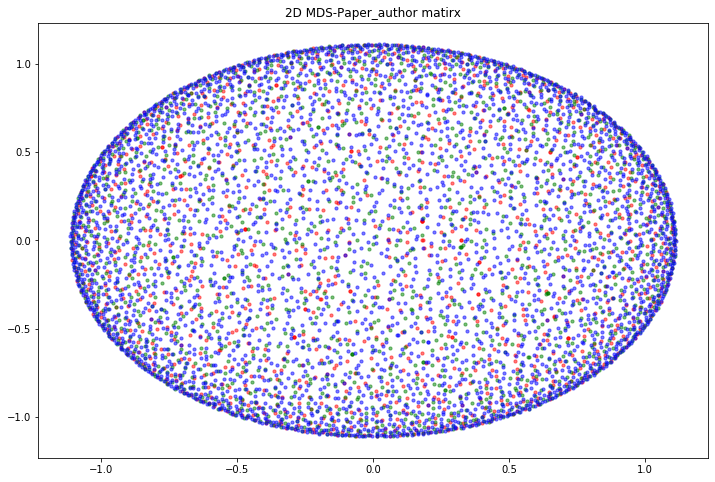

In [125]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(P1_mds2[:,0], P1_mds2[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.scatter(P2_mds2[:,0], P2_mds2[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.scatter(P3_mds2[:,0], P3_mds2[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('2D MDS-Paper_author matirx')
plt.show()

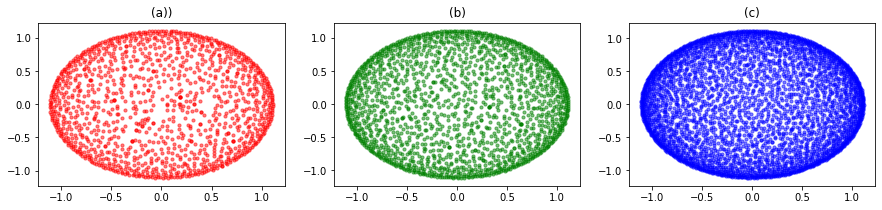

In [158]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(P1_mds2[:,0], P1_mds2[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.title('(a))')
plt.subplot(132)
plt.scatter(P2_mds2[:,0], P2_mds2[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.title('(b)')
plt.subplot(133)
plt.scatter(P3_mds2[:,0], P3_mds2[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('(c)')
plt.show()

#### 3D MDS

In [157]:
P_mds3 = mds3.fit_transform(P_norm)
print(P_mds3)

[[ 0.30103557 -0.81239951 -0.39034315]
 [ 0.51326031  0.80318021 -0.0438178 ]
 [ 0.1184818  -0.52544717  0.7863117 ]
 ...
 [ 0.52678087  0.44624965 -0.65332644]
 [-0.64176017  0.52945785  0.47733282]
 [ 0.28780529  0.90376982 -0.08926743]]


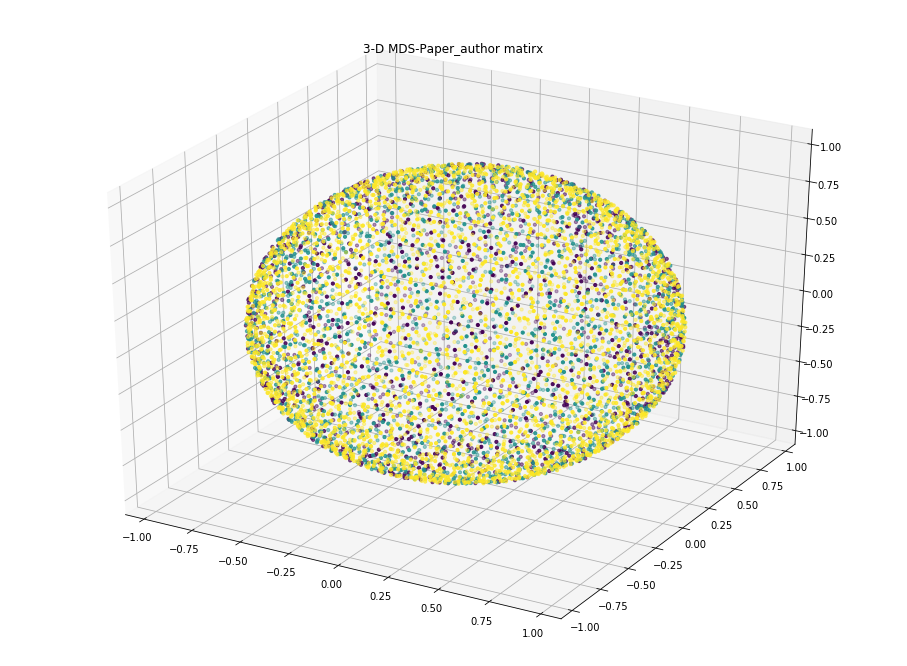

In [137]:
fig = plt.figure(figsize=(16, 12))
cm = plt.get_cmap("plasma")
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(P_mds3[:,0], P_mds3[:,1], P_mds3[:,2], s=10, c=cl, marker='o')  
plt.title('3-D MDS-Paper_author matirx')
plt.show()

# Part II. Manifold Learning

### Step 1: Construct Paper Graph
> We ultilize two method to construct such a paper graph:
>>1.**K nearest neighbor graph.**<br>
In sklearn.manifold, Isomap, Local Linear Embedding and Laplacian Eigenmap algorithms are implemented by conscturcting the k-nearest neighbor graph. <br><br>
>>2.**Graph based on common authors.**<br>
We consturct the connection between papers based on their common authors: if paper i and paper j have common author, we add a link between i and j with the number of the common author as the corresponding weight and set the reciprocal of number of the common author as the new weight when calculating the shortest path distance of i and j. We note the former matrix as A, and the other matrix as W. 

## 1.K nearest neighbor graph

### 1.1 Isomap

In [80]:
P_isom1 = ISO.fit_transform(P_norm)
print(P_isom1)

[[-1.69260522 -1.07534597]
 [-2.14517817 -0.48145833]
 [-1.81457892 -0.26586191]
 ...
 [-1.46550479  0.17353944]
 [ 3.11838606 -1.50601788]
 [ 0.62685468 -2.57075685]]


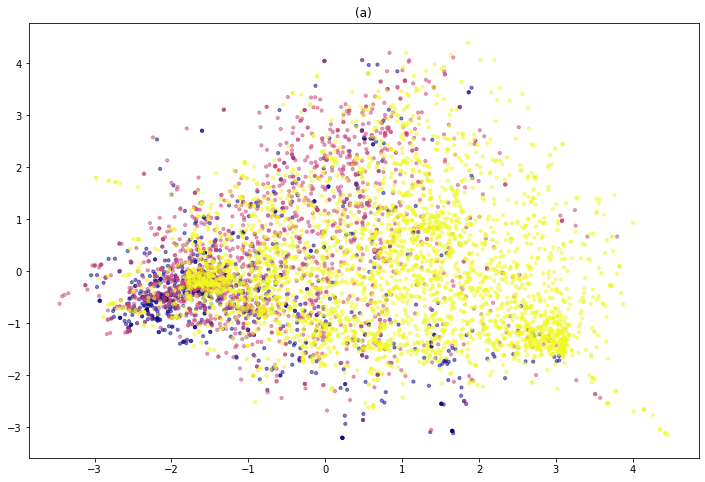

In [159]:
plt.figure(figsize=(12, 8))
plt.scatter(P_isom1[:,0], P_isom1[:,1], s=10, marker = 'o',c=cl, alpha=0.5,cmap='plasma')
plt.title('(a)')
plt.show()

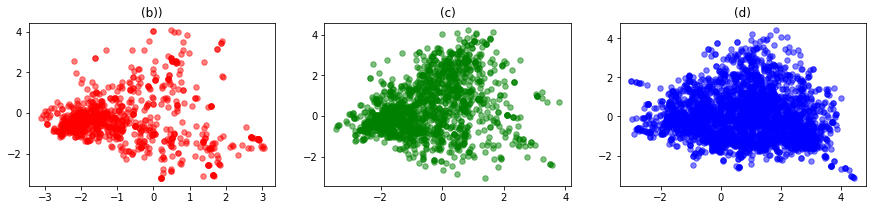

In [160]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(P_isom1[D1,0], P_isom1[D1,1], s=30, marker = 'o',c='r', alpha=0.5)
plt.title('(b))')
plt.subplot(132)
plt.scatter(P_isom1[D2,0], P_isom1[D2,1], s=30, marker = 'o',c='g', alpha=0.5)
plt.title('(c)')
plt.subplot(133)
plt.scatter(P_isom1[D3,0], P_isom1[D3,1], s=30, marker = 'o',c='b', alpha=0.5)
plt.title('(d)')
plt.show()

In [77]:
P1_isom1 = ISO.fit_transform(P1_norm)
print(P1_isom1)
P2_isom1 = ISO.fit_transform(P2_norm)
print(P2_isom1)
P3_isom1 = ISO.fit_transform(P3_norm)
print(P3_isom1)

[[-2.60827366 -1.77747492]
 [-0.74036234  0.5329289 ]
 [-1.49826171 -1.27076452]
 ...
 [ 1.83442681 -0.34059696]
 [-0.64247712 -0.13100818]
 [-0.64247712 -0.13100818]]
[[-1.9191195  -0.60600191]
 [-2.81010724  1.07890832]
 [-1.0173568  -0.42559609]
 ...
 [ 1.39351526 -0.23815941]
 [ 0.2003816  -1.02235649]
 [-0.02899138 -1.00334054]]
[[ 0.84766611 -1.43554454]
 [ 0.82224013  0.19761016]
 [ 2.39997243 -0.36166826]
 ...
 [-0.32224761  0.28562712]
 [-1.44813459 -0.658281  ]
 [-2.14036685 -0.79957999]]


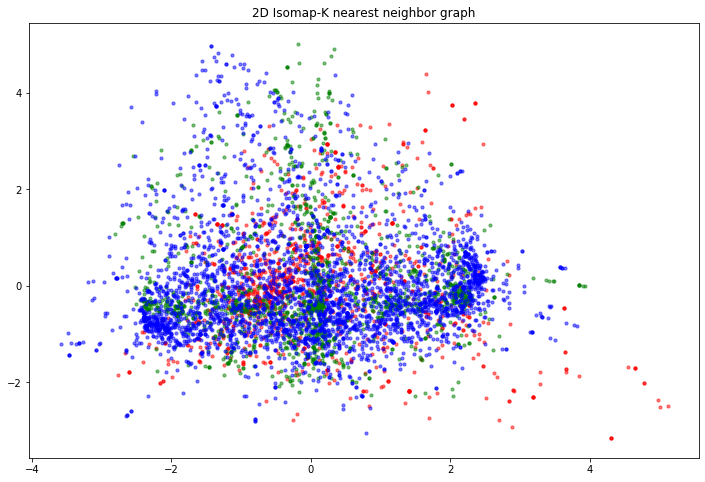

In [78]:
plt.figure(figsize=(12, 8))
plt.scatter(P1_isom1[:,0], P1_isom1[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.scatter(P2_isom1[:,0], P2_isom1[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.scatter(P3_isom1[:,0], P3_isom1[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('2D Isomap-K nearest neighbor graph')
plt.show()

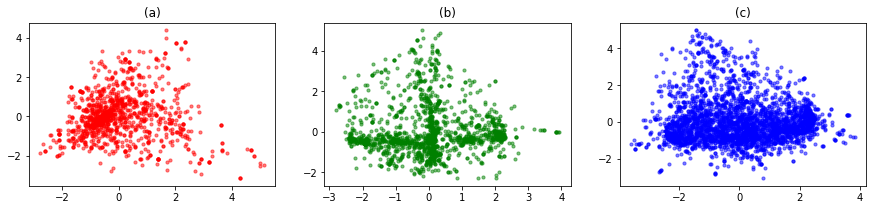

In [161]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(P1_isom1[:,0], P1_isom1[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.title('(a)')
plt.subplot(132)
plt.scatter(P2_isom1[:,0], P2_isom1[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.title('(b)')
plt.subplot(133)
plt.scatter(P3_isom1[:,0], P3_isom1[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('(c)')
plt.show()

### 1.2 LLE

In [83]:
P_lle1 = LLE.fit_transform(P_norm)
print(P_lle1)

[[-5.22936715e-03  4.58699369e-04]
 [-9.54923957e-03 -1.64661269e-03]
 [-5.58312735e-03  7.68767501e-05]
 ...
 [-3.45745296e-02 -1.59282721e-02]
 [-6.47382943e-03 -6.08140481e-04]
 [-1.16760822e-02 -2.82545306e-03]]


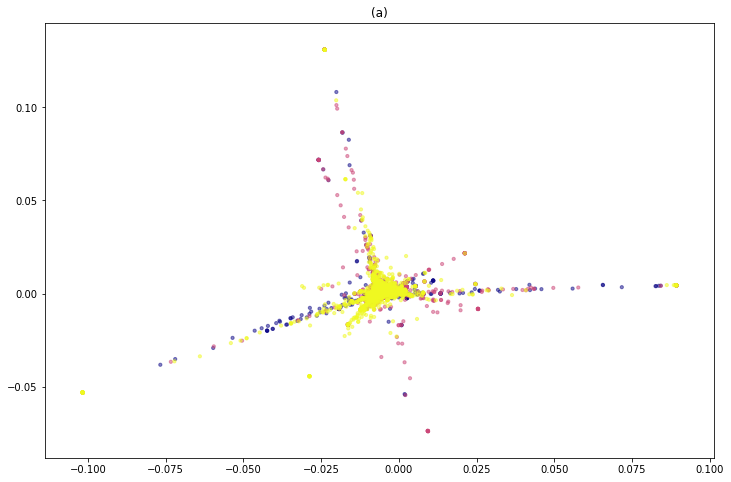

In [162]:
plt.figure(figsize=(12, 8))
plt.scatter(P_lle1[:,0], P_lle1[:,1], s=10, marker = 'o',c=cl, alpha=0.5,cmap='plasma')
plt.title('(a)')
plt.show()

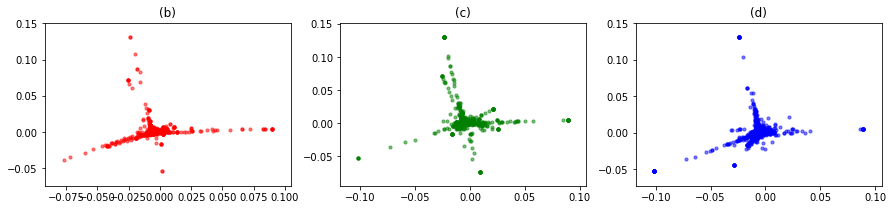

In [163]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(P_lle1[D1,0], P_lle1[D1,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.title('(b)')
plt.subplot(132)
plt.scatter(P_lle1[D2,0], P_lle1[D2,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.title('(c)')
plt.subplot(133)
plt.scatter(P_lle1[D3,0], P_lle1[D3,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('(d)')
plt.show()

In [118]:
P1_lle1 = LLE.fit_transform(P1)
print(P1_lle1)
P2_lle1 = LLE.fit_transform(P2)
print(P2_lle1)
P3_lle1 = LLE.fit_transform(P3)
print(P3_lle1)

[[ 0.00843203  0.000856  ]
 [ 0.00317479  0.00060629]
 [ 0.00654965  0.00151298]
 ...
 [ 0.0040347  -0.00016981]
 [ 0.00770776  0.00110873]
 [ 0.00660643  0.00149259]]
[[-0.00706574  0.01226689]
 [-0.00036692  0.01936333]
 [-0.00693389  0.01248133]
 ...
 [ 0.02385002  0.00260971]
 [ 0.0042518   0.00291647]
 [-0.00320074  0.01502554]]
[[-0.0122393  -0.00391429]
 [ 0.02510882  0.00547081]
 [-0.00752028 -0.01692361]
 ...
 [ 0.00679191  0.00188787]
 [-0.01774254 -0.0026997 ]
 [-0.00755412  0.00010191]]


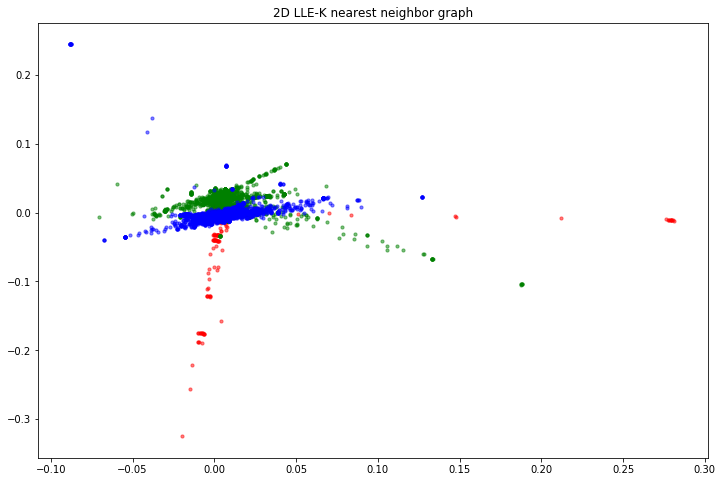

In [165]:
plt.figure(figsize=(12, 8))
plt.scatter(P1_lle1[:,0], P1_lle1[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.scatter(P2_lle1[:,0], P2_lle1[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.scatter(P3_lle1[:,0], P3_lle1[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('2D LLE-K nearest neighbor graph')
plt.show()

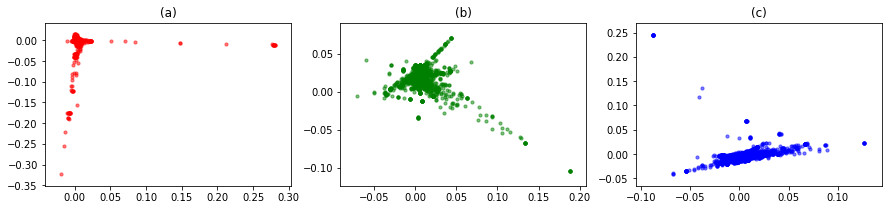

In [166]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(P1_lle1[:,0], P1_lle1[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.title('(a)')
plt.subplot(132)
plt.scatter(P2_lle1[:,0], P2_lle1[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.title('(b)')
plt.subplot(133)
plt.scatter(P3_lle1[:,0], P3_lle1[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('(c)')
plt.show()

## 2.Graph based on co-authors.

In [96]:
l = len(paper_ID)
W = np.zeros((l,l))
A = np.zeros((l,l))
A1 = A = np.zeros((l,l))
p1 = paper_ID.copy()
p2 = paper_ID.copy()
E2 = []
for i in p1:
    for j in p2:
        k = paper_au[i]["index"]
        d = paper_au[j]["index"]
        L = len(set(paper_au[i]["author"]).intersection(set(paper_au[j]["author"])))
        if L!=0 and k!=d:
            W[k][d] = round(1.0/L,2)
            W[d][k] = W[k][d]
            A[k][d] = L
            A[d][k] = A[k][d]
            A1[k][d] = 1
            A1[d][k] = 1
            E2.append((k,d))
    p2.remove(i)

### 2.1 Isomap

In [97]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(len(paper_ID)))
for e in E2:
    G.add_edge(e[0],e[1],weight=W[e[0],e[1]])

In [98]:
D = np.zeros((l,l))-np.ones((l,l))*10
for i in range(len(paper_ID)):
    pre,dist = nx.dijkstra_predecessor_and_distance(G,i)
    for d in sorted(dist.items()):
        D[i][d[0]] = d[1]
print(D)

[[  0.    10.33   2.   ...   8.   -10.    10.  ]
 [ 10.33   0.     9.33 ...   3.33 -10.     8.  ]
 [  2.     9.33   0.   ...   7.   -10.     9.  ]
 ...
 [  8.     3.33   7.   ...   0.   -10.     6.  ]
 [-10.   -10.   -10.   ... -10.     0.   -10.  ]
 [ 10.     8.     9.   ...   6.   -10.     0.  ]]


In [99]:
D_norm = sklearn.preprocessing.normalize(D)
D_mds = mds2.fit_transform(D_norm)
print(D_mds)

/home/zchencz/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


[[ 0.05204383  0.50024234]
 [ 0.12234577  0.36792041]
 [ 0.0632648   0.46058342]
 ...
 [ 0.08430401  0.19316648]
 [-0.8520671  -1.07753576]
 [ 0.15615933  0.37758148]]


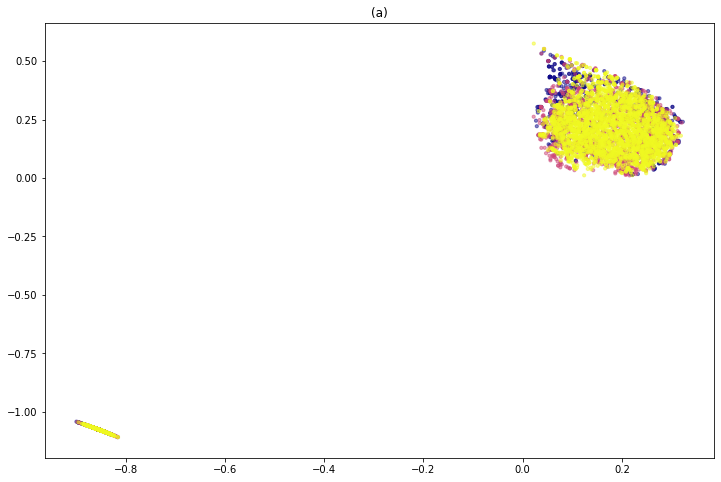

In [167]:
plt.figure(figsize=(12, 8))
plt.scatter(D_mds[:,0], D_mds[:,1], s=10, marker = 'o',c=cl, alpha=0.5,cmap='plasma')
plt.title('(a)')
plt.show()

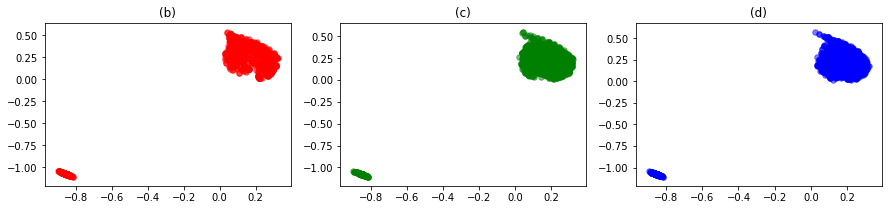

In [168]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(D_mds[D1,0], D_mds[D1,1], s=30, marker = 'o',c='r', alpha=0.5)
plt.title('(b)')
plt.subplot(132)
plt.scatter(D_mds[D2,0], D_mds[D2,1], s=30, marker = 'o',c='g', alpha=0.5)
plt.title('(c)')
plt.subplot(133)
plt.scatter(D_mds[D3,0], D_mds[D3,1], s=30, marker = 'o',c='b', alpha=0.5)
plt.title('(d)')
plt.show()

In [110]:
d1 = D[D1]
d1 = d1[:,D1]
d2 = D[D2]
d2 = d2[:,D2]
d3 = D[D3]
d3 = d3[:,D3]
print(d1.shape,d2.shape,d3.shape)

(1301, 1301) (1823, 1823) (3433, 3433)


In [111]:
D1_norm = sklearn.preprocessing.normalize(d1)
D1_mds = mds2.fit_transform(D1_norm)
print(D1_mds)
D2_norm = sklearn.preprocessing.normalize(d2)
D2_mds = mds2.fit_transform(D2_norm)
print(D2_mds)
D3_norm = sklearn.preprocessing.normalize(d3)
D3_mds = mds2.fit_transform(D3_norm)
print(D3_mds)

/home/zchencz/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


[[-0.52599124 -0.38673745]
 [-0.48979124 -0.20854525]
 [-0.49242367 -0.35361572]
 ...
 [-0.48151691  0.00518135]
 [-0.51356648 -0.09350232]
 [-0.51355588 -0.09353588]]


/home/zchencz/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


[[-0.40030117 -0.16595903]
 [-0.32438466 -0.0525023 ]
 [-0.28651704 -0.30136369]
 ...
 [-0.28908661 -0.19545573]
 [-0.19030308 -0.17800818]
 [-0.22664026 -0.26759854]]


/home/zchencz/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


[[-0.28354496 -0.16121131]
 [-0.21279718 -0.20562466]
 [-0.15227617 -0.04186842]
 ...
 [-0.19716878 -0.08421457]
 [ 1.47508852  0.28553893]
 [-0.34385988  0.05176758]]


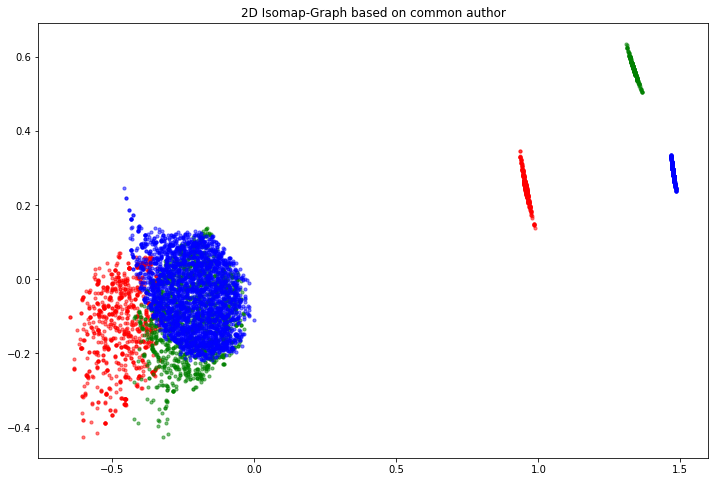

In [112]:
plt.figure(figsize=(12, 8))
plt.scatter(D1_mds[:,0], D1_mds[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.scatter(D2_mds[:,0], D2_mds[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.scatter(D3_mds[:,0], D3_mds[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('2D Isomap-Graph based on common author')
plt.show()

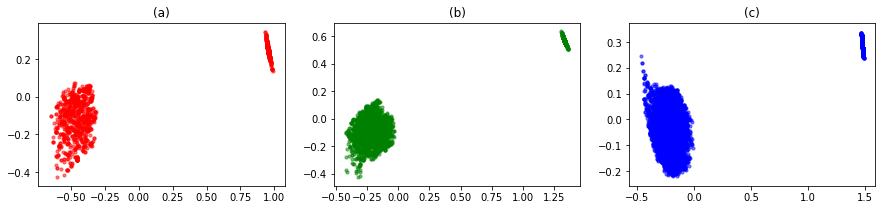

In [169]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(D1_mds[:,0], D1_mds[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.title('(a)')
plt.subplot(132)
plt.scatter(D2_mds[:,0], D2_mds[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.title('(b)')
plt.subplot(133)
plt.scatter(D3_mds[:,0], D3_mds[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('(c)')
plt.show()

In [135]:
SE = SpectralEmbedding(n_components=2)
A_se = SE.fit_transform(A_norm)
print(A_se)

[[ 3.82443233e-04  7.97510679e-05]
 [ 3.62094344e-04  7.53290287e-05]
 [ 2.40413837e-04  7.27902678e-05]
 ...
 [-2.25643415e-04  3.36816733e-05]
 [-2.23558334e-05 -4.19783947e-05]
 [ 2.83058307e-04  2.19919666e-04]]


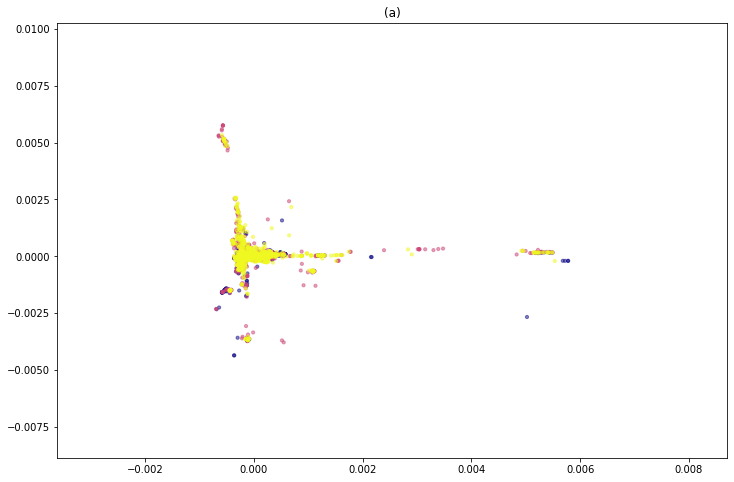

In [170]:
plt.figure(figsize=(12, 8))
plt.scatter(A_se[:,0], A_se[:,1], s=10, marker = 'o',c=cl, alpha=0.5,cmap='plasma')
plt.title('(a)')
plt.show()

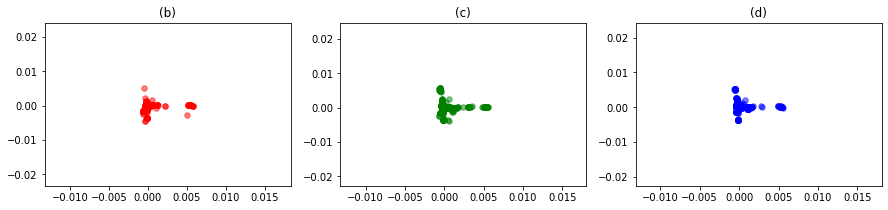

In [171]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(A_se[D1,0], A_se[D1,1], s=30, marker = 'o',c='r', alpha=0.5)
plt.title('(b)')
plt.subplot(132)
plt.scatter(A_se[D2,0], A_se[D2,1], s=30, marker = 'o',c='g', alpha=0.5)
plt.title('(c)')
plt.subplot(133)
plt.scatter(A_se[D3,0], A_se[D3,1], s=30, marker = 'o',c='b', alpha=0.5)
plt.title('(d)')
plt.show()

In [143]:
a1 = A[D1]
a1 = a1[:,D1]
a2 = A[D2]
a2 = a2[:,D2]
a3 = A[D3]
a3 = a3[:,D3]
print(a1.shape,a2.shape,a3.shape)

(1301, 1301) (1823, 1823) (3433, 3433)


In [146]:
a1_se = SE.fit_transform(a1)
print(a1_se)
a2_se = SE.fit_transform(a2)
print(a2_se)
a3_se = SE.fit_transform(a3)
print(a3_se)

[[-0.00077439 -0.00054991]
 [-0.0017577  -0.00074462]
 [-0.00146392 -0.00059911]
 ...
 [-0.00145552 -0.00020317]
 [-0.00142383 -0.00051907]
 [-0.00142383 -0.00051907]]
[[-2.65278919e-04 -2.09210448e-04]
 [ 2.42248453e-03 -1.64257664e-04]
 [ 2.19759489e-03 -1.26214451e-04]
 ...
 [ 4.37202162e-03  8.88585267e-05]
 [ 2.07820812e-03 -2.02356156e-04]
 [-1.08479681e-03 -1.29032430e-05]]
[[-8.29693073e-05 -2.52869395e-05]
 [ 8.41225723e-05  1.13542044e-04]
 [-1.21552413e-04 -6.38832421e-05]
 ...
 [-2.16859367e-04 -1.36244182e-04]
 [ 5.25134705e-05  2.28212142e-05]
 [-2.51737068e-04 -1.23896886e-04]]


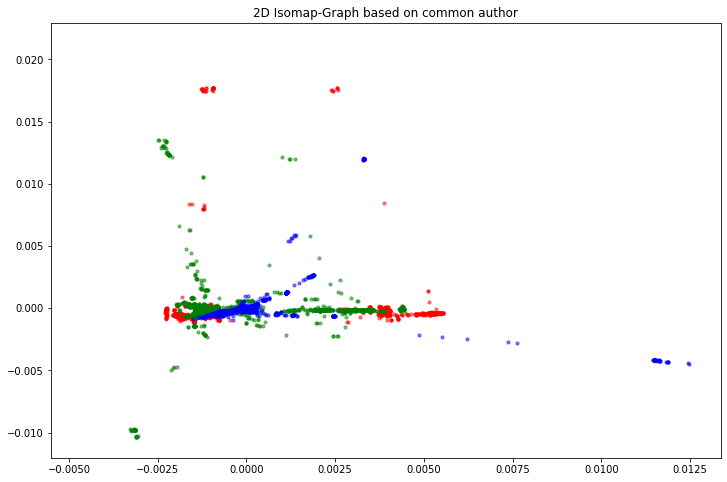

In [149]:
plt.figure(figsize=(12, 8))
plt.scatter(a1_se[:,0], a1_se[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.scatter(a2_se[:,0], a2_se[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.scatter(a3_se[:,0], a3_se[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('2D Isomap-Graph based on common author')
plt.show()

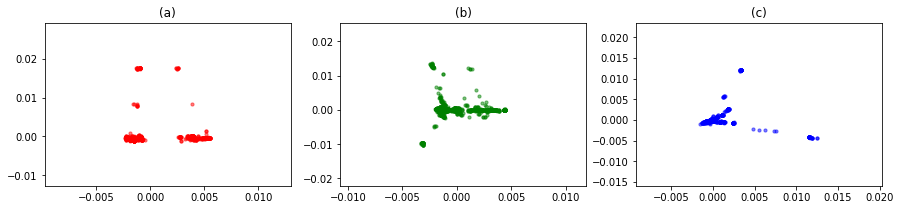

In [172]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(a1_se[:,0], a1_se[:,1], s=10, marker = 'o',c='r', alpha=0.5)
plt.title('(a)')
plt.subplot(132)
plt.scatter(a2_se[:,0], a2_se[:,1], s=10, marker = 'o',c='g', alpha=0.5)
plt.title('(b)')
plt.subplot(133)
plt.scatter(a3_se[:,0], a3_se[:,1], s=10, marker = 'o',c='b', alpha=0.5)
plt.title('(c)')
plt.show()

In [141]:
A1_se = SE.fit_transform(A1)
print(A1_se)

[[-8.57537552e-05 -8.59636240e-05]
 [-8.95364729e-05 -9.89822354e-05]
 [-9.09313687e-05 -9.98827872e-05]
 ...
 [-8.06422115e-05 -5.87898172e-05]
 [ 5.81061497e-06  1.62651571e-05]
 [-9.03001381e-05 -8.92221117e-05]]


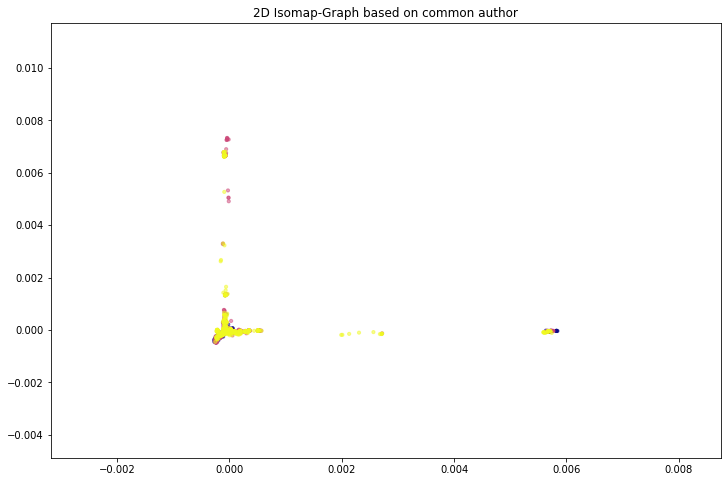

In [142]:
plt.figure(figsize=(12, 8))
plt.scatter(A1_se[:,0], A1_se[:,1], s=10, marker = 'o',c=cl, alpha=0.5,cmap='plasma')
plt.title('2D Isomap-Graph based on common author')
plt.show()

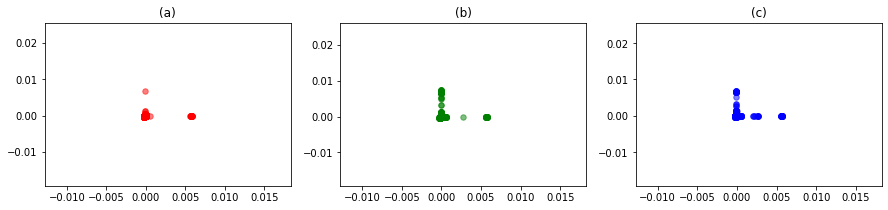

In [173]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.scatter(A1_se[D1,0], A1_se[D1,1], s=30, marker = 'o',c='r', alpha=0.5)
plt.title('(a)')
plt.subplot(132)
plt.scatter(A1_se[D2,0], A1_se[D2,1], s=30, marker = 'o',c='g', alpha=0.5)
plt.title('(b)')
plt.subplot(133)
plt.scatter(A1_se[D3,0], A1_se[D3,1], s=30, marker = 'o',c='b', alpha=0.5)
plt.title('(c)')
plt.show()